In [1]:
import pandas as pd
import hdbscan
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import Memory
from us import states

In [2]:
df = pd.read_csv('PM25-Speciated/Speciate_Raw_V07052024.csv')

In [3]:
df

,code,name,mass,cat1,cat2,cat3,species,weight%
0,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Ammonium,0.023000
1,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Potassium,1.843000
2,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Selenium,0.025000
3,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Silicon,7.736000
4,10,Overall Composite,55.476002,Miscellaneous,Miscellaneous,Miscellaneous,Sodium,1.377000
...,...,...,...,...,...,...,...,...
80895,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,100.000000,Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,Potassium,17.899160
80896,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,100.000000,Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,Sodium,0.168067
80897,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,100.000000,Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,Sulfate,3.361345
80898,SUGP02,Sugar Cane Pre-Harvest Burning Mexico,100.000000,Combustion,Biomass Burning; Agriculture,Pre-harvest Sugar Cane,Ammonium,2.184874


In [4]:
unique_names =  df['name'].str.replace('[-,%/0-9&)(]', '', regex=True).unique()

# Create a new DataFrame with unique names
unique_df = pd.DataFrame({'unique_name': unique_names})

In [5]:
unique_df

,unique_name
0,Overall Composite
1,Onroad Gasoline Cold Start
2,Onroad Gasoline Running
3,Onroad Diesel NonDPF Idle
4,Onroad Diesel NonDPF StartRun
...,...
941,Peat FireSmolderingMinnesota AE
942,Forest Fire UnderstoryFlamingMinnesota AE
943,Forest Fire UnderstorySmolderingMinnesota AE
944,Grass FireFieldKansas AE


In [6]:
state_names = [state.name.lower() for state in states.STATES]
state_abbrs = [state.abbr for state in states.STATES]

In [7]:
# Load the CSV file into a pandas DataFrame
city_df = pd.read_csv('PM25-Speciated/worldcities.csv')
city_names = city_df['city_ascii'].str.lower().tolist()  # First column
country_names = city_df['country'].str.lower().tolist()  # First column

# print("First column list:", city_names)

In [8]:
stop_words = TfidfVectorizer(stop_words='english').get_stop_words()

stop_words = list(list(stop_words)+ city_names + country_names + state_names + state_abbrs)

In [9]:
len(stop_words)

96154

In [10]:
# Assuming 'df' is your DataFrame and it has a column 'text' with the text data
# Sample dataframe and text column
# df = pd.DataFrame({'text': ['Python is great', 'Python is great', 'Machine learning is fascinating', 'Data science is fun', 'Python programming is my passion', 'I like to learn new things', 'I enjoy coding', 'Coding is challenging']})

# Convert text data into TF-IDF features
# vectorizer = TfidfVectorizer(stop_words='english')


# Initialize the vectorizer with the custom stop words
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(unique_df['unique_name'].str.lower())


# HDBSCAN clustering

In [11]:
# clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
#     gen_min_span_tree=True, leaf_size=40, memory=Memory(None),
#     metric='cosine', min_cluster_size=5, min_samples=None, p=None, cluster_selection_epsilon=0.0)
# #clusterer.fit(X.toarray())
# clusterer.fit(X)

In [35]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=40, memory=Memory(None),
    metric='cosine', min_cluster_size=10, min_samples=None, p=None, cluster_selection_epsilon=0.0)
#clusterer.fit(X.toarray())
clusterer.fit(X)

HDBSCAN(gen_min_span_tree=True, metric='cosine', min_cluster_size=10)

In [36]:
print(sum(clusterer.labels_ == -1))
print(max(clusterer.labels_)+1)

725
10


In [37]:
# # Apply HDBSCAN clustering
# clusterer = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True)
# clusterer.fit(X)

# Assign clusters
unique_df['cluster'] = clusterer.labels_

# Print clusters and their elements
clustered_texts = unique_df.groupby('cluster')['unique_name'].apply(list)
for cluster_num, texts in clustered_texts.items():
    print(f"Cluster {cluster_num}:")
    for text in texts:
        print(f"  - {text}")

Cluster -1:
  - Overall Composite
  - Onroad Gasoline Cold Start
  - Onroad Gasoline Running
  - Onroad Diesel NonDPF Idle
  - Onroad Diesel NonDPF StartRun
  - Onroad Diesel DPF
  - Onroad CNG NonOCR
  - Onroad CNG OCR
  - Nonroad Gasoline
  - Nonroad Diesel NonDPF
  - Nonroad Diesel DPF
  - Nonroad Diesel Airport
  - Nonroad Gas Turbine Aircraft
  - CoalFired Power Plant
  - External Combustion  CoalFired Composite
  - Uncontrolled CoalFired Power Plant Composite
  - CoalFired Power Plantesp Composite
  - Nonroad Diesel Rail
  - Coal And Refuse Derived Fuel RDFFired Power Plant
  - Nonroad Diesel Marine
  - Nonroad Residual Oil Marine
  - OilFired Power Plant
  - OilFired Power Plant Composite
  - WoodFired Boiler
  - External Combustion Boiler  CoalSlurry Fired
  - External Combustion  KeroseneFired Boiler Composite
  - External Combustion  WoodFired Boiler Composite
  - Hogged Fuel Boiler  Plywood Manufacturing
  - Hogged Fuel Boiler  Dutch Oven
  - Hogged Fuel Boiler  Stoker Boile

In [38]:
# clusterer.labels_

In [39]:
# clusterer.probabilities_

In [40]:
# clusterer.single_linkage_tree_.get_clusters(0.1, min_cluster_size=2)

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline


In [42]:
plt.rcParams['figure.figsize'] = [20, 20]

In [43]:
# sns.set_context('poster')
# sns.set_style('white')
# sns.set_color_codes()
# plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [44]:
from sklearn.decomposition import TruncatedSVD

In [45]:
# Convert sparse matrix to dense
# dense_data = clusterer.minimum_spanning_tree_._data.todense()  # Adjust method as necessary

In [46]:
# svd = TruncatedSVD(n_components=2)
# _data = svd.fit_transform(clusterer.minimum_spanning_tree_._data)
# clusterer.minimum_spanning_tree_.set_data = _data

# # Plot using dense data
# clusterer.minimum_spanning_tree_.plot(
#     edge_cmap='viridis',
#     edge_alpha=0.6,
#     node_size=80,
#     edge_linewidth=2
# )

<Axes: ylabel='$\\lambda$ value'>

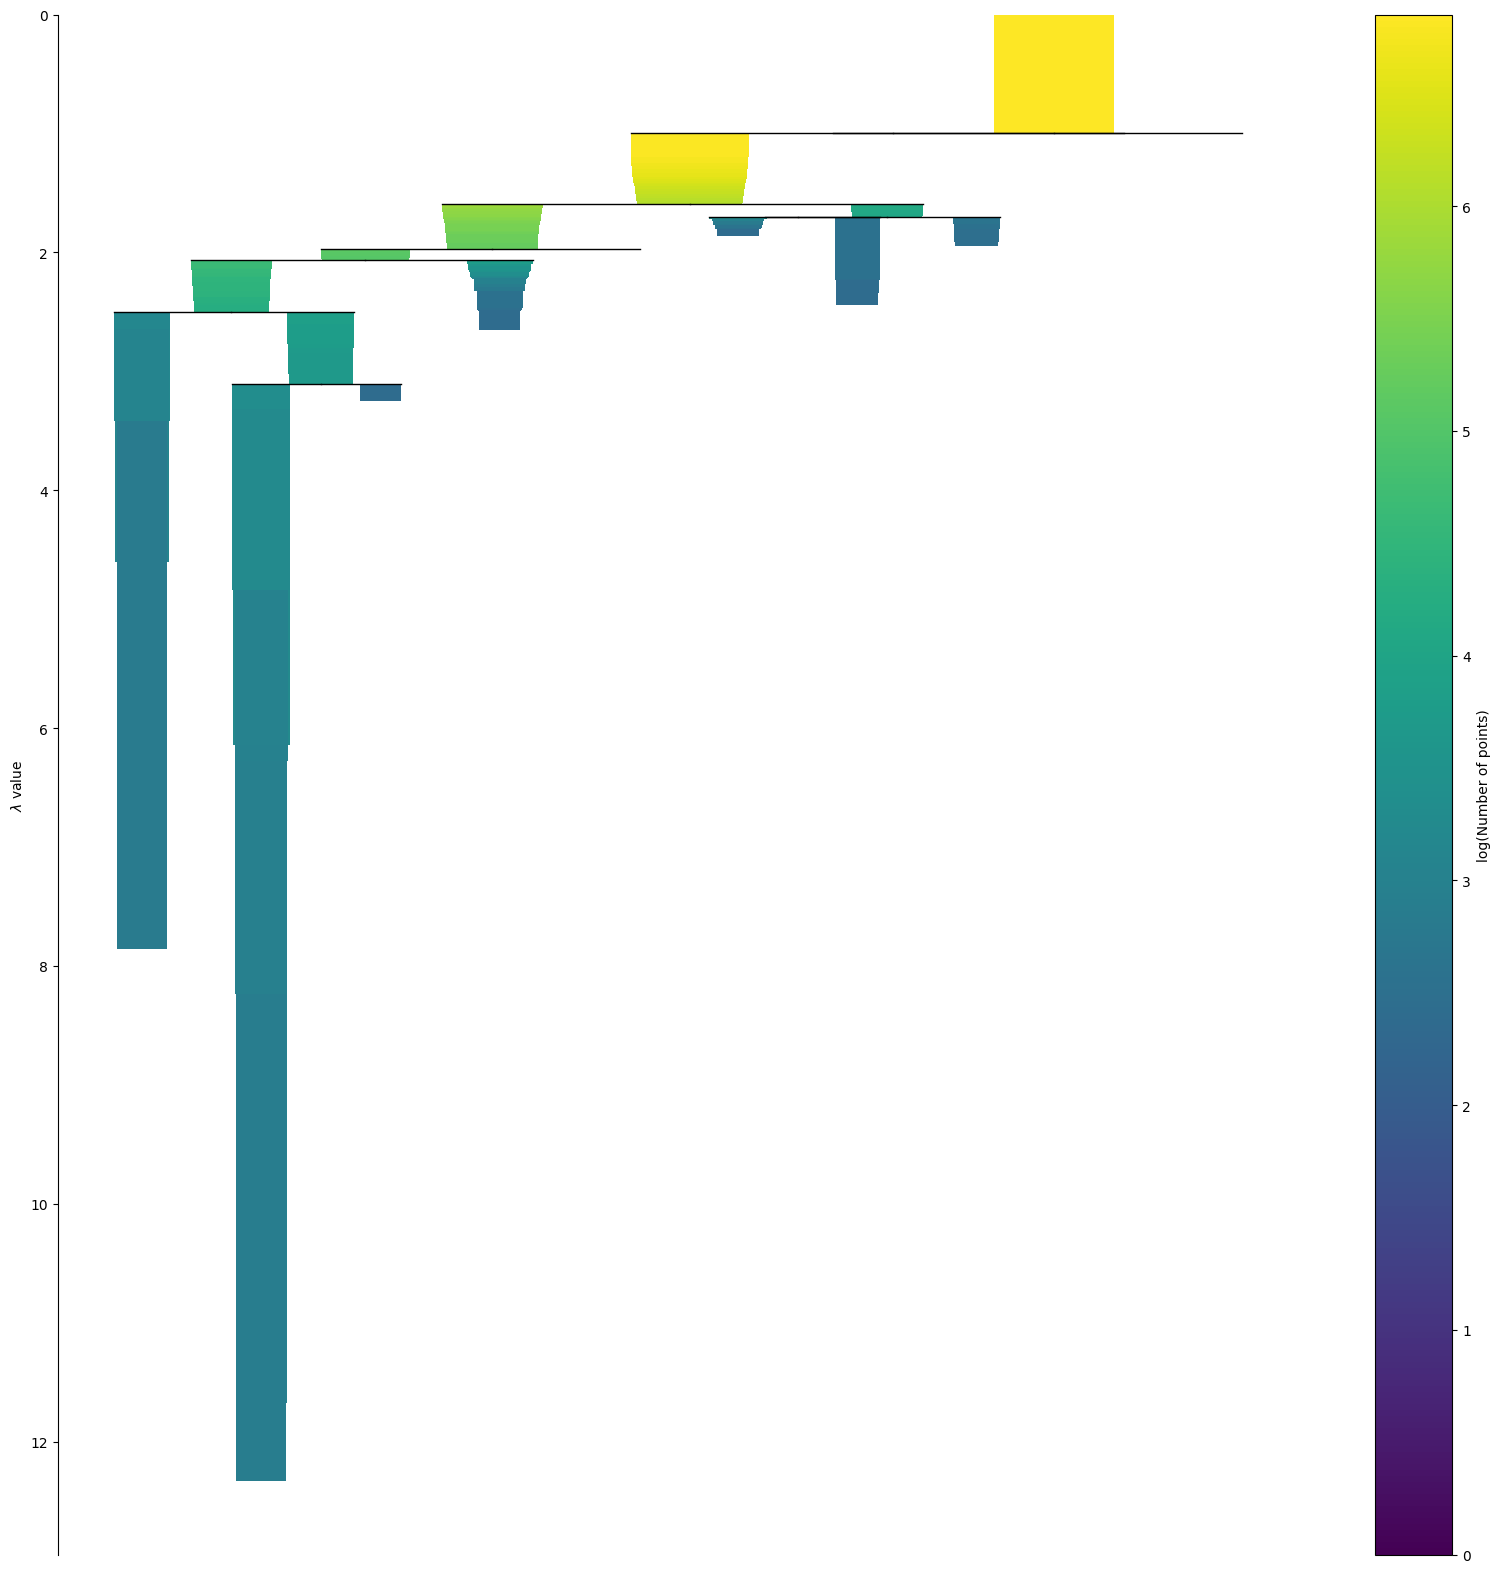

In [47]:
clusterer.condensed_tree_.plot(log_size=True)

/home/das90/.conda/envs/cent7/2020.11-py38/py311cu117pyg200/lib/python3.11/site-packages/hdbscan/plots.py:383: UserWarning: Infinite lambda values encountered in chosen clusters. This might be due to duplicates in the data.
  warn('Infinite lambda values encountered in chosen clusters.'


<Axes: ylabel='$\\lambda$ value'>

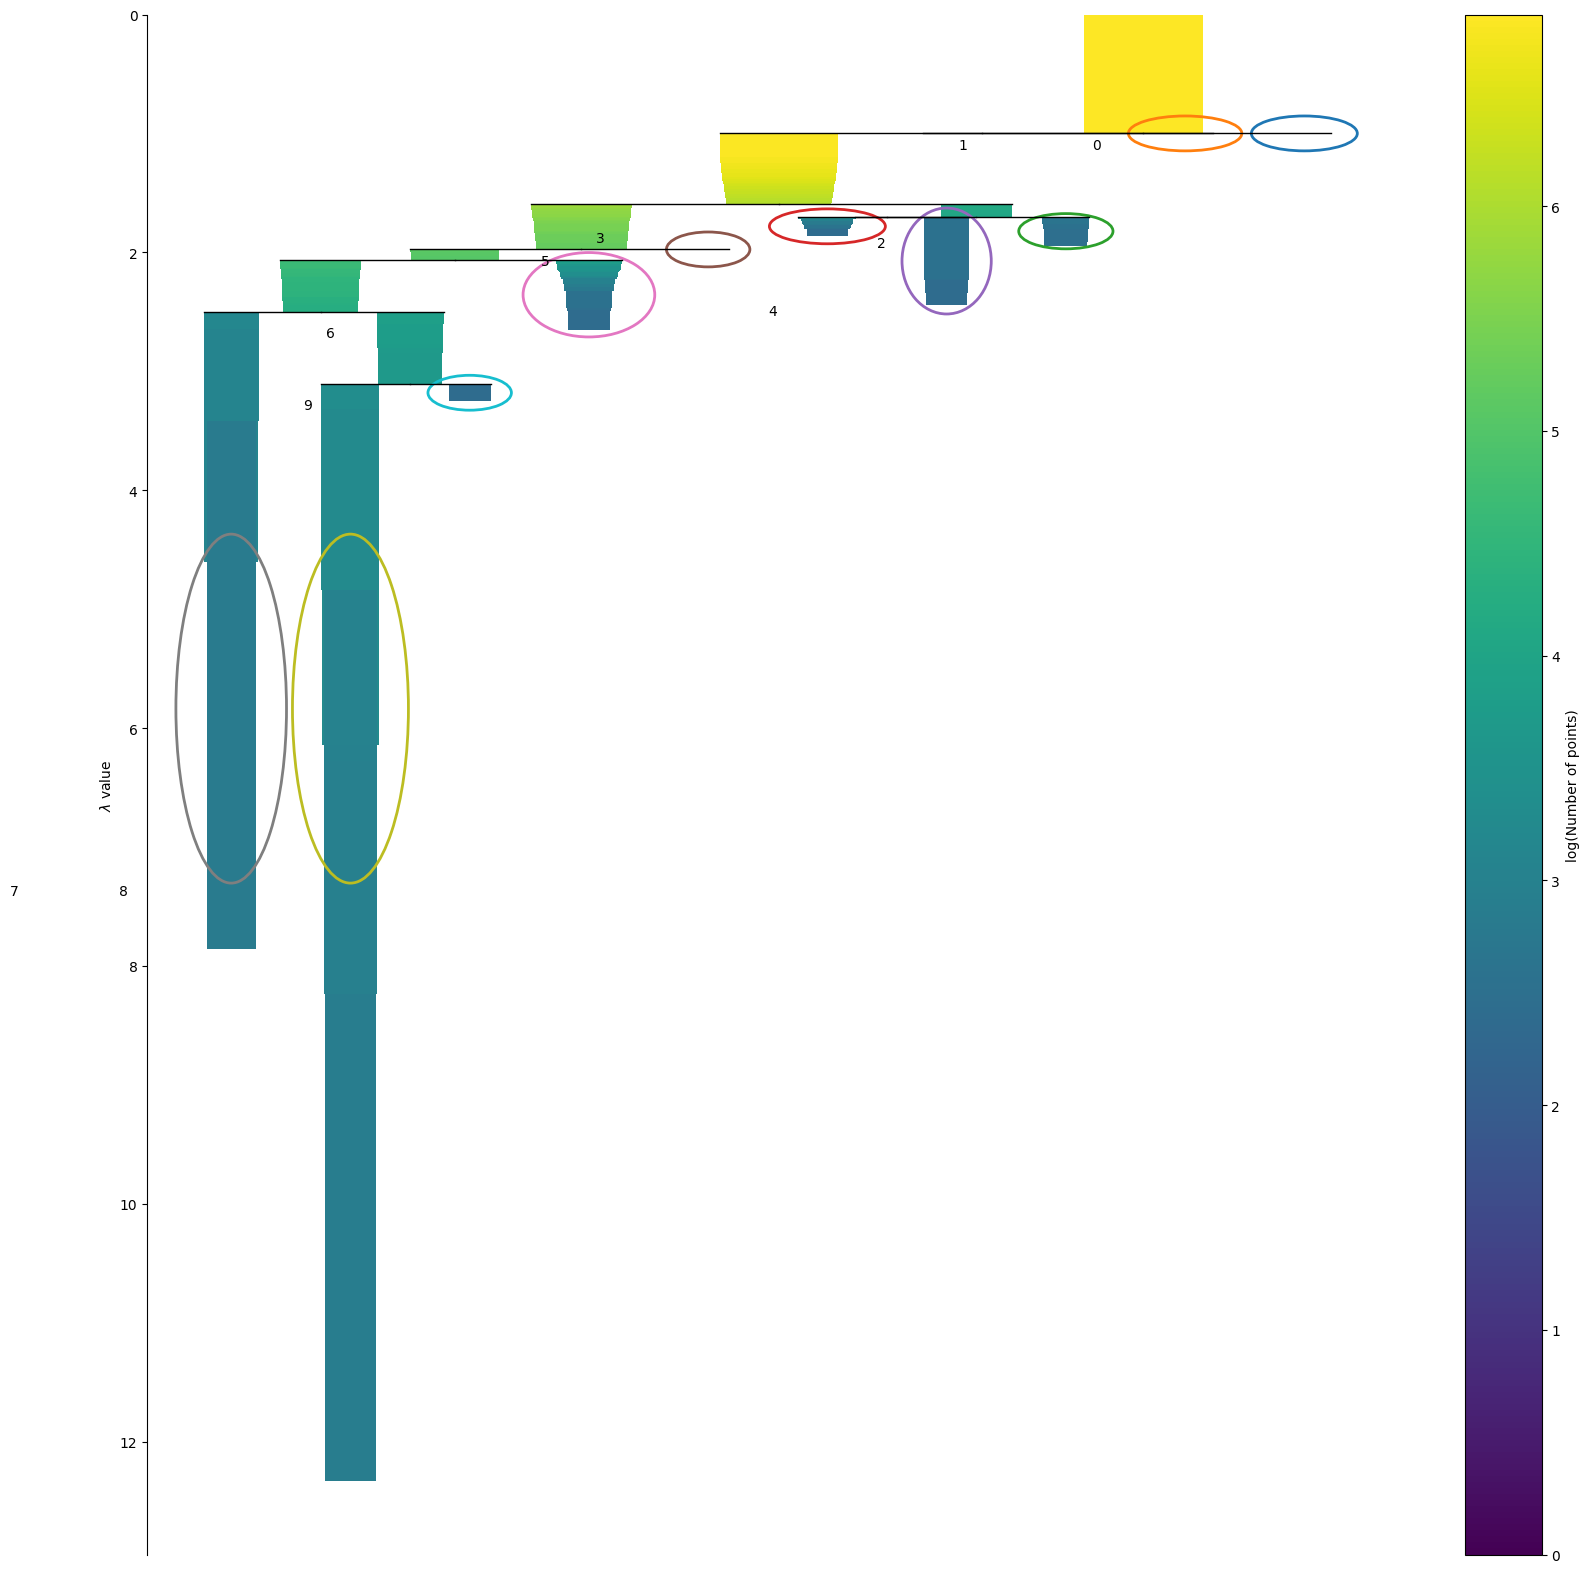

In [48]:
clusterer.condensed_tree_.plot(select_clusters=True, label_clusters = True, selection_palette=sns.color_palette(),log_size=True)

<Axes: ylabel='distance'>

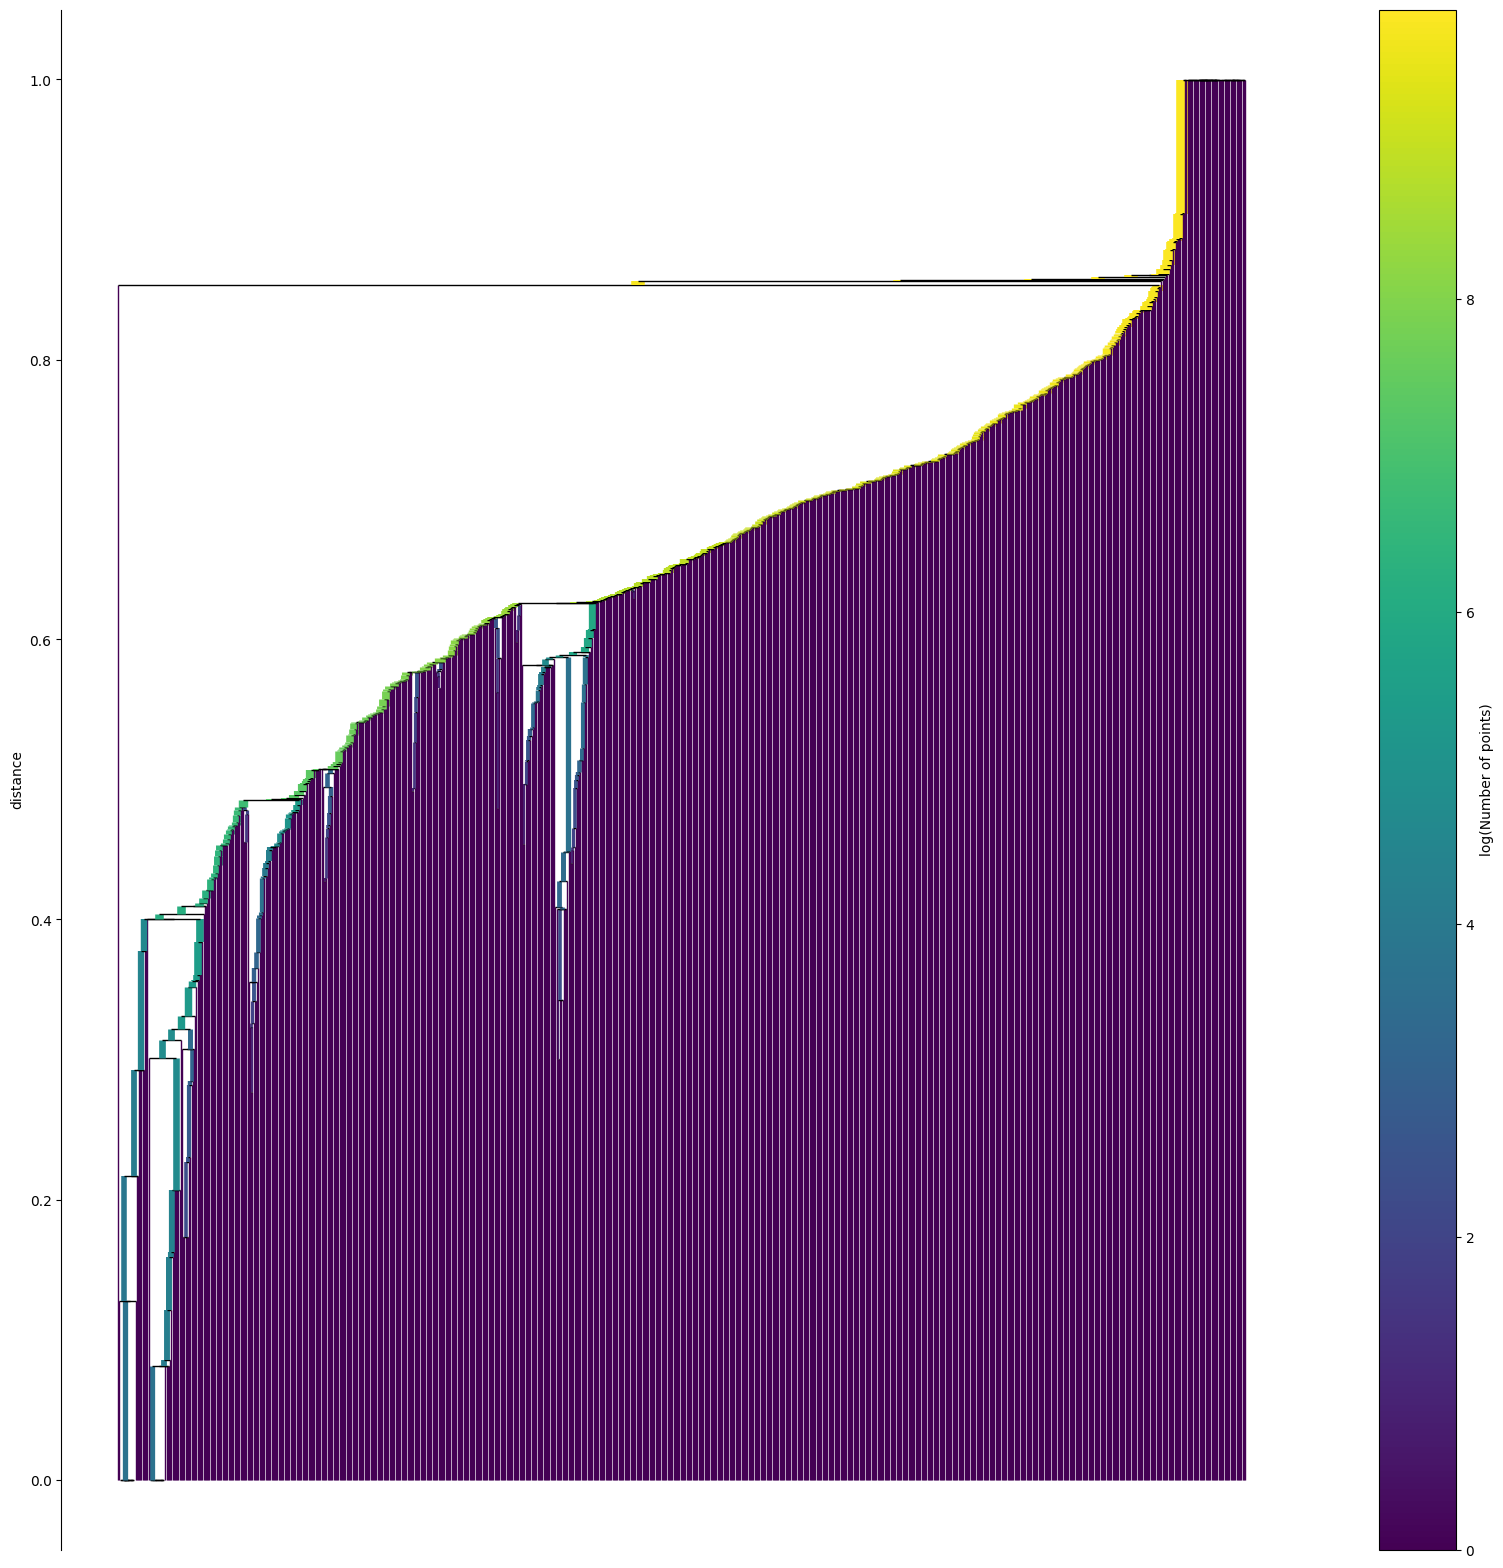

In [49]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

In [27]:
# cs =  hdbscan.robust_single_linkage_.RobustSingleLinkage()
# cs.fit(X)
# cs.cluster_hierarchy_.plot(cmap='viridis', colorbar=True)

# Kmeans clustering

In [28]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [50]:
num_clusters = 64
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init='auto')
unique_df['cluster_kmeans'] = kmeans.fit_predict(X)

In [51]:

# Step 4: Print clustered texts with cluster numbers
for cluster_num in range(num_clusters):
    print(f"\nCluster {cluster_num}:")
    cluster_texts = unique_df[unique_df['cluster_kmeans'] == cluster_num]['unique_name']
    for text in cluster_texts:
        print(f" - {text}")


Cluster 0:
 - Draft Catalytic Cracking  Composite
 - Catalytic Cracking  Composite
 - Draft Catalytic Cracking  Simplified
 - Catalytic Cracking  Simplified

Cluster 1:
 - Industrial Soil
 - Industrial Dust
 - Industrial Manufacturing  Average
 - Draft Industrial Soil  Composite
 - Industrial Manufacturing  Avg  Composite
 - Industrial Soil  Composite
 - Draft Industrial Soil  Simplified
 - Industrial Manufacturing  Avg  Simplified
 - Industrial Soil  Simplified

Cluster 2:
 - Residential Wood Combustion  nonEPA Certified Woodstove Pine
 - Residential Wood Combustion  nonEPA Certified Woodstove Almond
 - Residential Wood Combustion  NonEPA Certified Woodstove Pine
 - Residential Wood Combustion  NonEPA Certified Woodstove Pine Composite
 - Residential Wood Combustion  NonEPA Certified Woodstove Almond Composite
 - Residential Wood Combustion  NonEPA Certified Woodstove Pine and Almond Composite

Cluster 3:
 - Coal Dust
 - Draft Tire Dust  Composite
 - Tire Dust  Composite
 - Draft Tir

In [31]:
# Step 3: Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Alternatively, use TSNE for potentially better visualization
# tsne = TSNE(n_components=2, random_state=0)
# X_tsne = tsne.fit_transform(X.toarray())

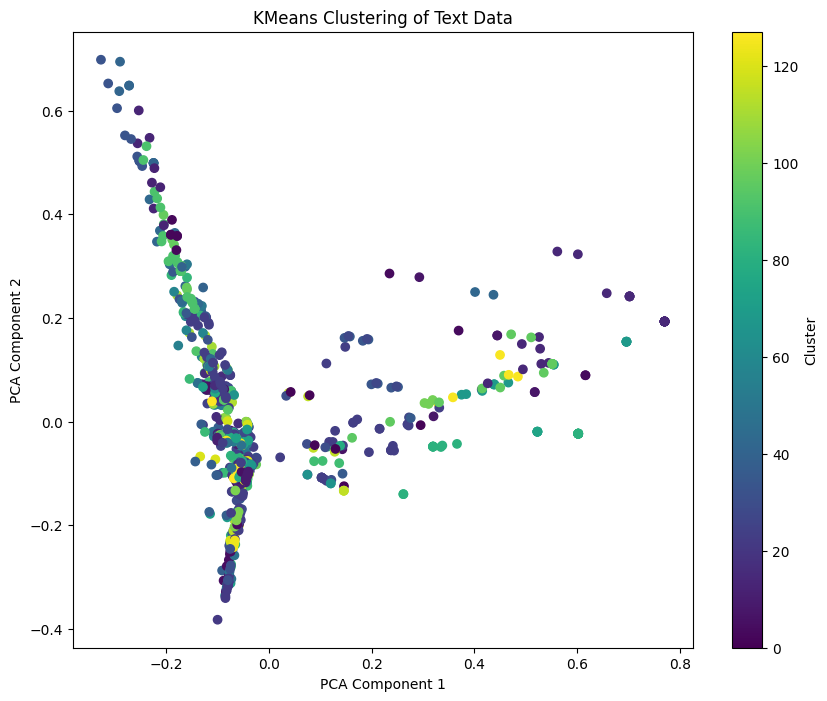

In [32]:
# Plot the clustering results
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=unique_df['cluster_kmeans'], cmap='viridis', marker='o')
plt.colorbar(label='Cluster')
plt.title('KMeans Clustering of Text Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()